# Exercises 1To5

1. Compute the average word length of shakespeare.txt.
2. Compute the word length distribution of shakespeare.txt.
3. Find the most frequent words of shakespeare.txt.
4. Count the number of words of shakespeare.txt starting with each letter of the alphabet.
5. Find the words pair most co-occurring next to each other of shakespeare.txt

## Loading all libraries

In [1]:
# import spark
from pyspark import SparkContext
# initialize a new Spark Context to use for the execution of the script
sc = SparkContext(appName="MY-APP-NAME", master="local[*]")
# prevent useless logging messages
sc.setLogLevel("ERROR")

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import re

## Read the input file

In [3]:
shakespeare_rdd = sc.textFile("hdfs://masterbig-1.itc.unipi.it:54310/masterbig_data/shakespeare.txt")

Check the content of `shakespeare_rdd`

In [4]:
shakespeare_rdd.take(4)

['This is the 100th Etext file presented by Project Gutenberg, and',
 'is presented in cooperation with World Library, Inc., from their',
 'Library of the Future and Shakespeare CDROMS.  Project Gutenberg',
 'often releases Etexts that are NOT placed in the Public Domain!!']

Clean the rdd of lines lowering the upper case characters and removing the non [a-z0-9 ] characters

In [5]:
pattern = re.compile("[^a-z0-9 ]+")
shakespeare_clean_rdd = shakespeare_rdd.map(lambda line: pattern.sub(' ', line.lower()))

## Ex1 - Average word length

Compute the average word length of shakespeare.txt.

In [6]:
lengths_rdd = shakespeare_clean_rdd.flatMap(lambda line: [len(w) for w in line.split()])

In [7]:
print("The average word length is {:.2f}".format(lengths_rdd.sum() / lengths_rdd.count()))

The average word length is 4.08


## Ex2 - Word length distribution

Compute the word length distribution of shakespeare.txt.

In [8]:
length_to_count = shakespeare_clean_rdd\
    .flatMap(lambda line: [(len(w), 1) for w in line.split()])\
    .reduceByKey(lambda l, r: l+r)\
    .collect()

In [9]:
print(dict(length_to_count))

{1: 11168, 2: 29875, 3: 35105, 4: 38089, 5: 20220, 6: 13961, 7: 9950, 8: 6520, 9: 3517, 10: 2056, 11: 730, 12: 248, 13: 79, 14: 17, 15: 6}


Plot the result

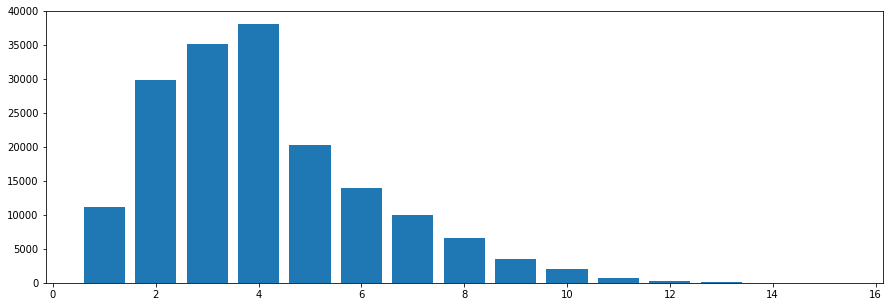

In [10]:
plt.figure(figsize=(15,5))
plt.bar(
    x=[length for length, count in length_to_count],
    height=[count for length, count in length_to_count]
)
plt.show()

## Ex3 - Most frequent words

Find the most frequent words of shakespeare.txt.

In [11]:
shakespeare_clean_rdd\
    .flatMap(lambda line: [(w, 1) for w in line.split()])\
    .reduceByKey(lambda x, y: x+y)\
    .takeOrdered(10, (lambda pair: -pair[1]))

[('the', 4893),
 ('and', 4440),
 ('i', 4254),
 ('to', 3775),
 ('of', 3435),
 ('you', 2855),
 ('a', 2547),
 ('that', 2261),
 ('my', 2185),
 ('in', 2075)]

## Ex4 - Number of words starting with each letter

Count the number of words of shakespeare.txt starting with each letter of the alphabet.

In [12]:
letters_to_count = shakespeare_clean_rdd\
    .flatMap(lambda line: [(w[0], 1) for w in line.split()])\
    .reduceByKey(lambda x,y: x+y)\
    .sortByKey()\
    .collect()

In [13]:
print(dict(letters_to_count))

{'t': 23800, 'v': 1124, '9': 15, 'q': 317, 'p': 4930, 'l': 5607, 's': 14146, 'n': 4991, 'k': 1244, 'd': 7121, 'c': 7079, 'o': 8232, 'x': 14, 'r': 2902, 'm': 10428, '5': 19, 'a': 15506, '7': 16, 'e': 3832, '3': 35, 'y': 5051, '8': 14, '0': 6, 'u': 1599, 'z': 5, '4': 34, 'g': 3519, 'w': 11362, 'i': 11733, 'j': 414, 'h': 11247, '1': 209, 'b': 8272, 'f': 6634, '2': 68, '6': 16}


Plot the result

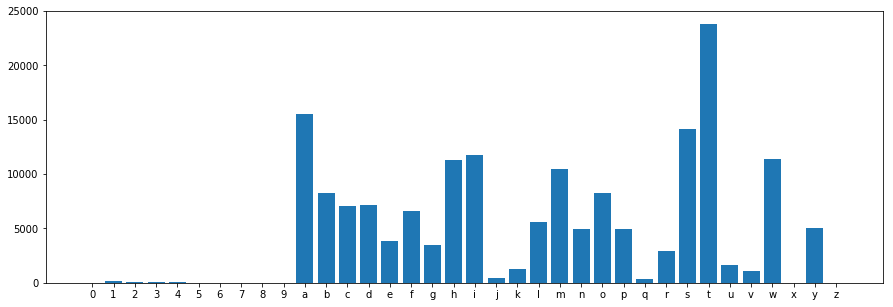

In [14]:
plt.figure(figsize=(15,5))
plt.bar(
    x=[l for l, freq in letters_to_count],
    height=[freq for l, freq in letters_to_count]
)
plt.show()

## Ex5 - Compute the bigrams

Find the words pair most co-occurring next to each other of shakespeare.txt

In [15]:
def line_to_bigram(line):
    words = line.split()
    return [(words[i-1], words[i]) for i in range(1, len(words))]

shakespeare_clean_rdd\
    .flatMap(line_to_bigram)\
    .map(lambda bigram: (bigram, 1))\
    .reduceByKey(lambda x,y: x+y)\
    .takeOrdered(10, (lambda pair: -pair[1]))

[(('i', 'am'), 344),
 (('i', 'have'), 321),
 (('i', 'll'), 308),
 (('of', 'the'), 305),
 (('in', 'the'), 259),
 (('i', 'will'), 247),
 (('to', 'the'), 238),
 (('of', 'syracuse'), 233),
 (('antipholus', 'of'), 202),
 (('it', 'is'), 200)]